In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/Data.csv")

In [3]:
df.head()

,text,subject
0,Donald Trump just couldn t wish all Americans ...,News
1,House Intelligence Committee Chairman Devin Nu...,News
2,"On Friday, it was revealed that former Milwauk...",News
3,"On Christmas day, Donald Trump announced that ...",News
4,Pope Francis used his annual Christmas Day mes...,News


In [4]:
df.describe(include='all')


,text,subject
count,44919,44898
unique,38657,19
top,,politicsNews
freq,627,11272


In [5]:
df.shape

(44919, 2)

In [6]:
df['subject'].value_counts()

politicsNews                                                                                                                                                                                                                                                                                    11272
worldnews                                                                                                                                                                                                                                                                                       10145
News                                                                                                                                                                                                                                                                                             9050
politics                                                                                                              

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     44919 non-null  object
 1   subject  44898 non-null  object
dtypes: object(2)
memory usage: 702.0+ KB


In [8]:
df.isnull().sum()

text        0
subject    21
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.duplicated().sum()

865

In [11]:
df = df.drop_duplicates(keep = "first")

In [12]:
categories =['politicsNews','worldnews','News','politics','left-news','Government News','US_News','Middle-east ']

In [13]:
df = df[df['subject'].isin(categories)]

In [14]:
df['subject'].value_counts()

politicsNews       11214
worldnews           9989
News                9050
politics            6422
left-news           4303
Government News     1499
US_News              775
Name: subject, dtype: int64

In [15]:
df['subject'] = df['subject'].replace({'politicsNews': 'politics'})

In [16]:
df['subject'].value_counts()

politics           17636
worldnews           9989
News                9050
left-news           4303
Government News     1499
US_News              775
Name: subject, dtype: int64

(array([ 9050.,     0., 17636.,     0.,  1499.,     0.,  4303.,     0.,
          775.,  9989.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

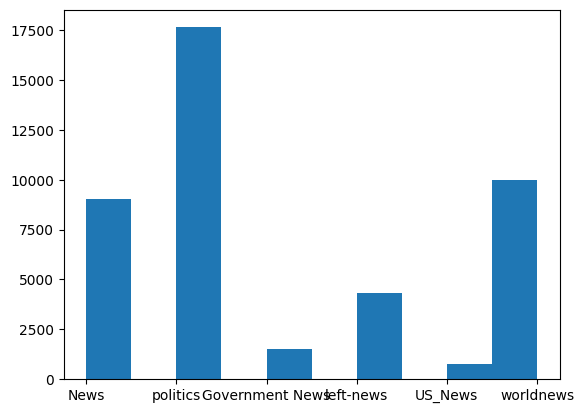

In [17]:
plt.hist(df['subject'])

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
df['subject']=encoder.fit_transform(df['subject'])


In [20]:
df.head()

,text,subject
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [21]:
df['subject'].value_counts()

4    17636
5     9989
1     9050
3     4303
0     1499
2      775
Name: subject, dtype: int64

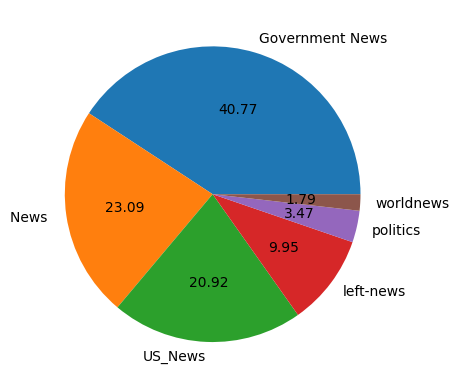

In [22]:

plt.pie(df['subject'].value_counts(),labels = ['Government News','News ','US_News','left-news','politics','worldnews'],autopct="%0.2f")
plt.show()

In [23]:
import nltk


In [24]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
ps= PorterStemmer()

In [25]:
def lemmatization(text):
    lm= WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text

In [26]:
df['text']= df['text'].apply(lemmatization)
df.head()

,text,subject
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it be reveal that former Milwaukee ...",1
3,"On Christmas day, Donald Trump announce that h...",1
4,Pope Francis use his annual Christmas Day mess...,1


In [27]:
def text_transform(text):
    text= text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [28]:
text_transform("Today we are going to analyse different text classification algorithms")

'today go analys differ text classif algorithm'

In [29]:
df['transformed text']=df['text'].apply(text_transform)

In [31]:
df.head()

,text,subject,transformed text
0,Donald Trump just couldn t wish all Americans ...,1,donald trump wish american happi new year leav...
1,House Intelligence Committee Chairman Devin Nu...,1,hous intellig committe chairman devin nune go ...
2,"On Friday, it be reveal that former Milwaukee ...",1,friday reveal former milwauke sheriff david cl...
3,"On Christmas day, Donald Trump announce that h...",1,christma day donald trump announc would back w...
4,Pope Francis use his annual Christmas Day mess...,1,pope franci use annual christma day messag reb...


In [32]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [33]:
politics_wc = wc.generate(df[df['subject']==4]['transformed text'].str.cat(sep=" "))



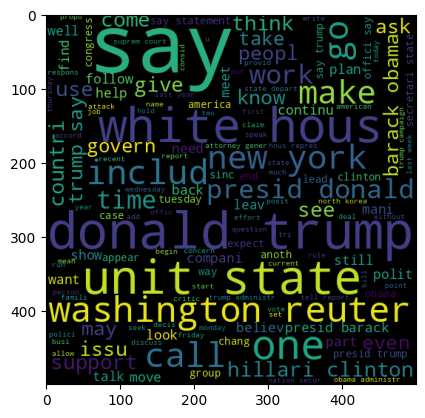

In [34]:
plt.imshow(politics_wc)

In [35]:
worldnews_wc = wc.generate(df[df['subject']==5]['transformed text'].str.cat(sep=" "))


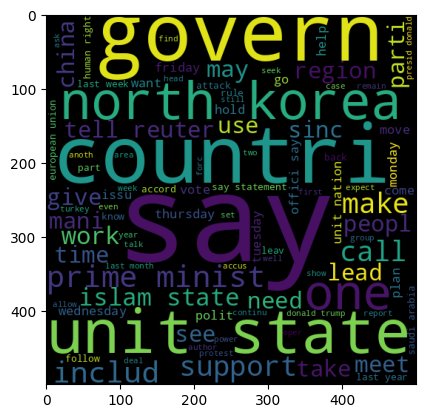

In [36]:
plt.imshow(worldnews_wc)

In [37]:
News_wc = wc.generate(df[df['subject']==1]['transformed text'].str.cat(sep=" "))


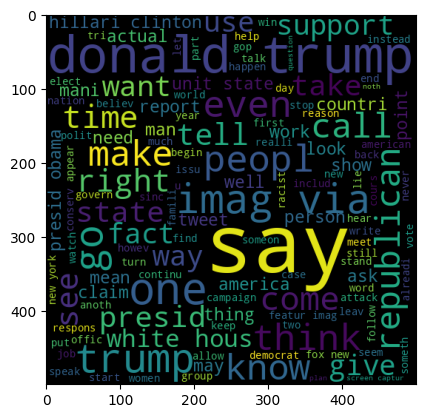

In [38]:
plt.imshow(News_wc)

In [39]:
leftnews_wc = wc.generate(df[df['subject']==3]['transformed text'].str.cat(sep=" "))


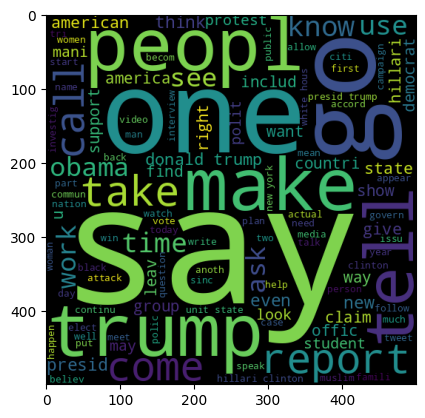

In [40]:
plt.imshow(leftnews_wc)

In [41]:
GovernmentNews_wc = wc.generate(df[df['subject']==0]['transformed text'].str.cat(sep=" "))

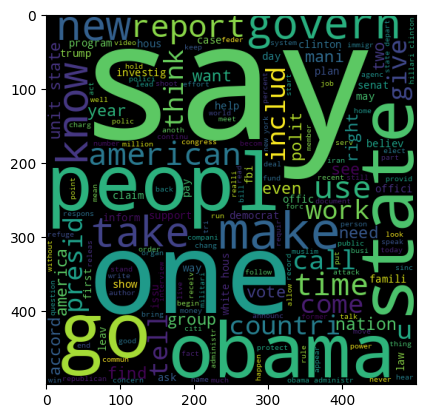

In [42]:
plt.imshow(GovernmentNews_wc )

In [43]:
US_News_wc = wc.generate(df[df['subject']==2]['transformed text'].str.cat(sep=" "))

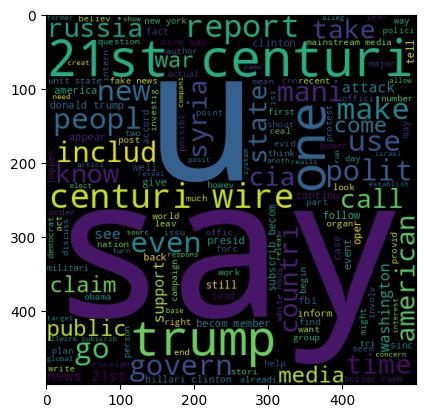

In [44]:
plt.imshow(US_News_wc )

# Cleaning and Preprocessing is done

In [45]:
df = df[['subject','transformed text']]

In [46]:
df.head()

,subject,transformed text
0,1,donald trump wish american happi new year leav...
1,1,hous intellig committe chairman devin nune go ...
2,1,friday reveal former milwauke sheriff david cl...
3,1,christma day donald trump announc would back w...
4,1,pope franci use annual christma day messag reb...


# Creating new file with cleaned text for making future models

In [51]:
df.to_csv('data/CleanedData.csv', index = False)
